# Research Question(s)

In previous research, we demonstrated that native speakers of Panara are sensitive to three distinct acoustic cues when making phonemic identification judgments of nasal-stop clusters in their language:
- Duration of the stop closure: longer stop closures were more often perceived as underlyingly /NT/ (vs. /N/)
- Presence/absence of a stop burst: presence of a stop burst biased listeners to perceive underlyingly /NT/
- Source of the nasal portion of the sequence: if the nasal portion came from underlyingly /NT/, there was bias to perceive it as /NT/

Our goal in this followup AXB task was to expand our research in two ways. 
1. First, we wished to **confirm that native English speakers do not behave the same as Panara speakers**. To that end, we designed the AXB task to include both a traditional AXB design, in which A and B are stimuli that differ from each other in only one dimension, and X is identical to one of them. In this type of task, we would expect a peak in "correct" discrimination of X with A or B at pre-established identification boundaries. In contrast, we should expect English speakers naive to Panara's phonological system to show little or no peak in discrimination, though they may show improvements in correct discrimination.
1. Second, the AXB task provided a unique opportunity to ask ***which* of the three manipulated acoustic cues *most* affected listeners' behavior**. In addition to the usual AXB task where X is identical to one of A or B, we added trials in which A and B differed along *two* dimensions, and X was the same as A in one dimension but the same as B in the other dimension. 

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode  # for help handling unicode

# Reading in data

This script assumes the following file structure:

./AXB.ipynb <br>
./english/ <br>
./english/datafile1.csv <br>
./english/datafile2.csv <br>
./english/datafile3.csv <br>
./english/etc <br>
./panara/datafile1.csv <br>
./panara/datafile2.csv <br>
./panara/datafile3.csv <br>
./panara/etc <br>

## Reading in response data

First, read in all of the non-Panara speakers' data.  These data were collected through OpenSesame, which gives us a ton of variables we're not really interested in, so we'll also pare the columns down to just what we need, and also rename them.
Since we'll be joining this data with the Panara speakers' data, we'll want to be able to tell which subjects are Panara native speakers and which aren't, so we'll also add a new field for subject language.

In [2]:
engdir = os.path.abspath('./english/')
files = [f for f in os.listdir(engdir) if f[-4:]=='.csv']
responsedf_eng = pd.DataFrame()
for f in files:
    tdf = pd.read_csv(os.path.join(engdir,f))
    responsedf_eng = pd.concat([responsedf_eng, tdf])

In [3]:
responsedf_eng = responsedf_eng[['subject_nr','count_X','flip_order','stimA','stimX','stimB','response']]
responsedf_eng = responsedf_eng.rename(columns={"subject_nr":"subject", "count_X":"order", "stimA": "A", 
                                                "stimX":"X", "stimB":"B"})
responsedf_eng['population'] = 'American'
responsedf_eng.head()

,subject,order,flip_order,A,X,B,response,population
0,118,0,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American
1,118,1,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American
2,118,2,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American
3,118,3,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American
4,118,4,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American


The resulting dataframe has the following fields:
- subject: the subject's ID
- order: the order of stimulus presentation
- A, X, B: the files associated with A, X, and B; during setup, the time-step of A is _always_ less than that of B, and in order to vary this, we relied on a randomly generated variable flip_order
- flip_order: whether A and B were flipped during presentation; this is a fix for the problem of wanting to vary whether A or B has the higher step value, but having too many AXB sets to present subjects with the full factorial design
- response: subjects' response
- language: subjects' language category

Next, we'll do the same for the Panara speakers' data.  Here, we also have an additional field:
- repeats: the number of times the subject repeated each stimulus set before selecting their response. This field is potentially relevant for deciding to remove a participant from the data if they weren't able to attend the task well, and is not available for English speakers' data as we did not include repeats in the English speakers' version of the task.

In [4]:
panaradir = os.path.abspath('./panara/')
files = [f for f in os.listdir(panaradir) if f[-4:]=='.csv']
responsedf_pan = pd.DataFrame()
for f in files:
    tdf = pd.read_csv(os.path.join(panaradir,f))
    responsedf_pan = pd.concat([responsedf_pan, tdf])

In [5]:
responsedf_pan = responsedf_pan[['subject','order','repeats','flip_order','A','X','B','response']]
responsedf_pan['population']='Panara'
responsedf_pan.head()

,subject,order,repeats,flip_order,A,X,B,response,population
0,Pyjopen,0,3,1,3.2.1.wav,3.2.3.wav,3.2.3.wav,l,Panara
1,Pyjopen,1,1,1,1.2.3.wav,1.2.5.wav,1.2.5.wav,l,Panara
2,Pyjopen,2,1,1,4.2.2.wav,4.2.2.wav,4.2.4.wav,f,Panara
3,Pyjopen,3,1,1,4.1.1.wav,4.1.1.wav,4.1.3.wav,l,Panara
4,Pyjopen,4,1,1,3.2.2.wav,3.2.2.wav,3.2.4.wav,f,Panara


We'll join the data together, but we should note from above two fields that differ in encoding between the data sets, based on how the experiments were executed:
- response: for English speakers, we expected responses of 1 or 0, corresponding to "the middle matches the first" and "the middle matches the last" respectively, but for Panara speakers we expected 'f' or 'l' instead.
- flip_order: in the English data, these are "yes" and "no", but in the Panara data, these are "1" and "0" respectively.

In [6]:
responsedf = pd.concat([responsedf_eng,responsedf_pan],sort=False)
responsedf.head()

,subject,order,flip_order,A,X,B,response,population,repeats
0,118,0,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American,NaN
1,118,1,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American,NaN
2,118,2,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American,NaN
3,118,3,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American,NaN
4,118,4,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American,NaN


## Read and add demographic information

Now, let's incorporate what demographic information we have on the subjects. We'll create a dataframe with demographic information, `demodf` to merge with the master response dataframe.

In [11]:
demo_eng = pd.read_csv('./demo_eng.csv')
# demo_eng.age = demo_eng.age.astype(int)
demo_eng = demo_eng.drop(['state'], axis=1)
demo_eng['clan'] = demo_eng['village'] = ''
# demo_eng.english = demo_eng.english.astype(bool)
# demo_eng.subject = demo_eng.subject.astype(str)

demo_pan = pd.read_excel('./participants.xlsx')
# demo_pan.age = demo_pan.age.astype(int)
demo_pan['english']=False
demo_pan['languages']='Panara'
demo_pan['country']='Brazil'
# demo_pan.english = demo_pan.english.astype(bool)

In [12]:
# note some Panara names are written with unicode
demo_pan.subject = demo_pan.subject.apply(lambda x: unidecode.unidecode(x))

In [13]:
demodf = pd.concat([demo_eng, demo_pan])
demodf.head()

,age,gender,country,english,languages,date,subject,clan,village
0,48.0,Female,USA,True,English,5/30/19,701,,
1,50.0,Male,USA,True,"English, Tagalog",5/30/19,702,,
2,29.0,Male,USA,True,"English, Spanish",5/30/19,703,,
3,43.0,Female,USA,True,English,5/30/19,704,,
4,19.0,Non-binary,USA,True,"English, Spanish",6/6/19,101,,


In [14]:
responsedf = responsedf.merge(demodf,'left',on=['subject'])
responsedf.head()

,subject,order,flip_order,A,X,B,response,population,repeats,age,gender,country,english,languages,date,clan,village
0,118,0,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American,NaN,26.0,Female,USA,True,English,9/17/19,,
1,118,1,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American,NaN,26.0,Female,USA,True,English,9/17/19,,
2,118,2,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American,NaN,26.0,Female,USA,True,English,9/17/19,,
3,118,3,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American,NaN,26.0,Female,USA,True,English,9/17/19,,
4,118,4,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American,NaN,26.0,Female,USA,True,English,9/17/19,,


# Cleaning the data: addressing errors and other irregularities

## Handling responses that are not expected

One problem we encounter early on is that not all responses match the expected responses.  So we'll repair this by making some reasonable guesses as to what the subjects _intended_ when they responded. Recall, we are only expecting 1, 0, l, and f

In [15]:
# First see what kinds of responses we got!
responsedf.response.unique()

array([1, 0, '1', '0', '-', 'left', 'space', 2, 3, '`', 'right', 'l', 'f',
       'e', nan, 'd', 'ff', '3'], dtype=object)

In [16]:
responsedf.response = responsedf.response.apply(lambda x: 'f' if x in ['e','d','ff'] else x)
# This response occurs specifically in one Panara subject's data, where '3' seems to have replaced 'l', as all other
# responses in this subject's data are 'f'
responsedf.response = responsedf.response.apply(lambda x: 'l' if x=='3' else x) 
responsedf.response = responsedf.response.apply(lambda x: 1 if x in [2,3,'1','`','left'] else x)
responsedf.response = responsedf.response.apply(lambda x: 0 if x in ['0','right','-'] else x)
responsedf = responsedf[~responsedf.response.isna()]
responsedf = responsedf[responsedf.response!='space']  # Remove 'spacebar' responses; only occurs 3 times
responsedf.response.unique()

array([1, 0, 'l', 'f'], dtype=object)

A couple more little fixes to make the data consistent.

In [17]:
responsedf['order']=responsedf['order']+1
responsedf.response = responsedf.response.apply(lambda x: 1 if x=='f' else (0 if x=='l' else x))
responsedf.flip_order = responsedf.flip_order.apply(lambda x: 'yes' if x==1 else ('no' if x==0 else x))
responsedf.head()

,subject,order,flip_order,A,X,B,response,population,repeats,age,gender,country,english,languages,date,clan,village
0,118,1,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American,NaN,26.0,Female,USA,True,English,9/17/19,,
1,118,2,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American,NaN,26.0,Female,USA,True,English,9/17/19,,
2,118,3,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American,NaN,26.0,Female,USA,True,English,9/17/19,,
3,118,4,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American,NaN,26.0,Female,USA,True,English,9/17/19,,
4,118,5,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American,NaN,26.0,Female,USA,True,English,9/17/19,,


## Identifying rogue participants

We know that a few participants didn't actually complete the study, so let's find those subjects and remove them from the data.

In [18]:
incompletes = [s for s in responsedf.subject.unique() if len(responsedf[responsedf.subject==s])<198]
responsedf = responsedf[~responsedf.subject.isin(incompletes)]
incompletes

[139, 'Papyri', 'Saaso', 'Nokrea', 'Tunpo', 'Sokkree']

We also observed that some Panara speakers didn't appear to understand the task.  In particular, we noticed that some subjects routinely responded with alternating responses, and others responded with a streak of the same response.  Both cases suggest to us that the subjects were participating in the task because they wished to be part of the study, but didn't truly understand what they were being asked to do.  The next several cells tries to locate these subjects (in both the Panara and non-Panara speaking groups) and remove them from the data.

First, we'll define three functions, each of which creates a new column in a given dataframe.
- streak1 and streak0: for each row, it returns the number of 0s or 1s in a row that the subject responded with.
- altstreak: for each row, returns the number of alternating 0/1 responses in a row that the subject responded with.

In [19]:
def streak1(x):
    x['streak1'] = x.groupby((x['response'] != 1).cumsum()).cumcount() + ((x['response'] != 1).cumsum() == 0).astype(int) 
    return x

def streak0(x):
    x['streak0'] = x.groupby((x['response'] != 0).cumsum()).cumcount() + ((x['response'] != 0).cumsum() == 0).astype(int) 
    return x

def altstreak(x):
    x['streakalt'] = x.groupby((x['streak'] != 1).cumsum()).cumcount() + ((x['streak'] != 1).cumsum() == 0).astype(int) 
    return x

In [20]:
responsedf = responsedf.groupby('subject', sort=False).apply(streak1)
responsedf = responsedf.groupby('subject', sort=False).apply(streak0)
responsedf['streak'] = responsedf.streak1+responsedf.streak0
responsedf = responsedf.groupby('subject', sort=False).apply(altstreak)
responsedf.head(10)

,subject,order,flip_order,A,X,B,response,population,repeats,age,...,country,english,languages,date,clan,village,streak1,streak0,streak,streakalt
0,118,1,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American,NaN,26.0,...,USA,True,English,9/17/19,,,1,0,1,1
1,118,2,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American,NaN,26.0,...,USA,True,English,9/17/19,,,2,0,2,0
2,118,3,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American,NaN,26.0,...,USA,True,English,9/17/19,,,3,0,3,0
3,118,4,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American,NaN,26.0,...,USA,True,English,9/17/19,,,0,1,1,1
4,118,5,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American,NaN,26.0,...,USA,True,English,9/17/19,,,0,2,2,0
5,118,6,no,1.2.2.wav,1.2.4.wav,1.2.4.wav,1,American,NaN,26.0,...,USA,True,English,9/17/19,,,1,0,1,1
6,118,7,no,4.1.2.wav,4.1.4.wav,4.1.4.wav,1,American,NaN,26.0,...,USA,True,English,9/17/19,,,2,0,2,0
7,118,8,yes,1.1.1.wav,1.1.1.wav,1.1.3.wav,0,American,NaN,26.0,...,USA,True,English,9/17/19,,,0,1,1,1
8,118,9,no,2.2.1.wav,2.2.3.wav,2.2.3.wav,1,American,NaN,26.0,...,USA,True,English,9/17/19,,,1,0,1,2
9,118,10,yes,2.1.1.wav,2.1.1.wav,2.1.3.wav,1,American,NaN,26.0,...,USA,True,English,9/17/19,,,2,0,2,0


Now, let's find the maximum streak of either 1s or 0s as well as the maximum alternating streak for each subject.
When we plot these two values against each other, we see that the vast majority of our subjects cluster together, but a handful of Panara speaking subjects are clear outliers.  In particular, it appears that a cutoff of either 25 (less generous) or 50 (more generous) for both plain streaks and alternating streaks should handle all of these outliers.

In [21]:
maxstreaks = responsedf.groupby(['subject'], as_index=False).aggregate(np.max)

/opt/miniconda3/envs/general/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


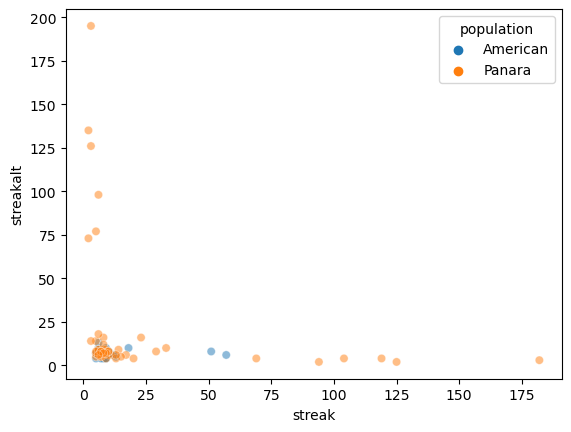

In [22]:
ax = sns.scatterplot('streak', 'streakalt', data=maxstreaks, hue='population', alpha=.5)
fig = ax.get_figure()
fig.savefig('ABX_error1.pdf')

Armed with this information, we can now restrict our data to only those subjects who we expect did attend to the task as we intended.

In [23]:
maxstreaks['valid'] = maxstreaks.apply(lambda x: x.streak < 50 and x.streakalt < 50, axis=1)
valid = maxstreaks[maxstreaks.valid].subject.unique()
valid

array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 140, 141, 142, 143,
       144, 145, 701, 702, 703, 704, 705, 'Josin', 'Jotikja', 'Kankoo',
       'Kape', 'Kapitao', 'Karo', 'Kasso', 'Kjepokjyn', 'Kjepopo',
       'Kokwari', 'Kopyn', 'Krekjon', 'Kuka', 'Kwankoren', 'Kypakja',
       'Mikre', 'Paasora', 'Pakrekaka', 'Paryti', 'Passi', 'Patty',
       'Peamiri', 'Pokjati', 'Prinkre', 'Pritty', 'Pukjora', 'Pyjopen',
       'Saankora', 'Sakjera', 'Sakjykjy', 'Seewa', 'Seppu', 'Tenko',
       'Tenko2', 'Tepakriti', 'Tepipjo', 'Tetata', 'Twaturanpjuu'],
      dtype=object)

In [24]:
responsedf = responsedf[responsedf.subject.isin(valid)]

# Interpreting the data

## Turn the data into something interpretable

Now to start wrangling the responses into interpretable data.

First, let's turn 1s and 0s into As and Bs.  In the dataframe, a response of 1 means the subject responded that X was most like the first of the stimuli, while 0 means they responded that it was most like the second.  The stimuli were generated with A and B always being 2 steps apart temporally, with A having the shorter of the two N durations.  To balance the stimuli presentation, each stimulus set was presented in AXB order _and_ BXA order.  Therefore, the columns `flip_order` and `response` together indicate whether the subject chose A or B.

In [25]:
responsedf['response_AB'] = responsedf.apply(lambda x: 'A' if (x.response==1 and x.flip_order=='no') 
                                             or (x.response==0 and x.flip_order=='yes') 
                                             else 'B', axis=1)

Next, we'll determine which of the three spectral variables was changed (if any).

In [26]:
responsedf['change_vowel'] = responsedf.apply(lambda x: False if (x.A[0] in ['1','2'] and x.B[0] in ['1','2'])
                                              or (x.A[0] in ['3','4'] and x.B[0] in ['3','4'])
                                              or (x.A[0]==x.B[0])
                                              else True, axis=1)
responsedf['change_nsource'] = responsedf.apply(lambda x: False if (x.A[0] in ['1','3'] and x.B[0] in ['1','3'])
                                              or (x.A[0] in ['2','4'] and x.B[0] in ['2','4'])
                                              or (x.A[0]==x.B[0])
                                              else True, axis=1)
responsedf['change_burst'] = responsedf.apply(lambda x: x.A[2]!=x.B[2], axis=1)
responsedf.head()

,subject,order,flip_order,A,X,B,response,population,repeats,age,...,clan,village,streak1,streak0,streak,streakalt,response_AB,change_vowel,change_nsource,change_burst
0,118,1,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American,NaN,26.0,...,,,1,0,1,1,A,False,False,False
1,118,2,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American,NaN,26.0,...,,,2,0,2,0,B,False,False,False
2,118,3,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American,NaN,26.0,...,,,3,0,3,0,A,False,False,False
3,118,4,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American,NaN,26.0,...,,,0,1,1,1,B,False,False,False
4,118,5,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American,NaN,26.0,...,,,0,2,2,0,B,False,False,False


**Ultimately what we want to determine is whether the subject felt that X was most similar to the stimulus with which it shared spectral values or temporal values.**

To do this, we'll first define two columns, `same_spectral` and `same_temporal` which contain A or B depending on which of the two shares spectral and temporal qualities with X, respectively.

In [27]:
responsedf['same_spectral']=responsedf.apply(lambda x: '' if not (x.change_vowel or x.change_nsource or x.change_burst)
                 else ('A' if x.A[0:3]==x.X[0:3] else 'B'), axis=1)
responsedf['same_temporal']=responsedf.apply(lambda x: 'A' if x.A[4]==x.X[4] else 'B', axis=1)
responsedf.head()

,subject,order,flip_order,A,X,B,response,population,repeats,age,...,streak1,streak0,streak,streakalt,response_AB,change_vowel,change_nsource,change_burst,same_spectral,same_temporal
0,118,1,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American,NaN,26.0,...,1,0,1,1,A,False,False,False,,A
1,118,2,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American,NaN,26.0,...,2,0,2,0,B,False,False,False,,B
2,118,3,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American,NaN,26.0,...,3,0,3,0,A,False,False,False,,A
3,118,4,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American,NaN,26.0,...,0,1,1,1,B,False,False,False,,A
4,118,5,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American,NaN,26.0,...,0,2,2,0,B,False,False,False,,B


Then, we can determine whether for each response, the subject matched X with its temporal match or its spectral match.

In [28]:
responsedf['match_temporal'] = responsedf.apply(lambda x: 1 if x.same_temporal==x.response_AB else 0, axis=1)
responsedf['match_spectral'] = responsedf.apply(lambda x: 1 if x.same_spectral==x.response_AB else 0, axis=1)
responsedf.head()

,subject,order,flip_order,A,X,B,response,population,repeats,age,...,streak,streakalt,response_AB,change_vowel,change_nsource,change_burst,same_spectral,same_temporal,match_temporal,match_spectral
0,118,1,no,1.1.3.wav,1.1.3.wav,1.1.5.wav,1,American,NaN,26.0,...,1,1,A,False,False,False,,A,1,0
1,118,2,yes,2.1.1.wav,2.1.3.wav,2.1.3.wav,1,American,NaN,26.0,...,2,0,B,False,False,False,,B,1,0
2,118,3,no,3.1.2.wav,3.1.2.wav,3.1.4.wav,1,American,NaN,26.0,...,3,0,A,False,False,False,,A,1,0
3,118,4,no,1.2.3.wav,1.2.3.wav,1.2.5.wav,0,American,NaN,26.0,...,1,1,B,False,False,False,,A,0,0
4,118,5,no,2.2.3.wav,2.2.5.wav,2.2.5.wav,0,American,NaN,26.0,...,2,0,B,False,False,False,,B,1,0


Finally we'll add more details about the stimuli to the data frame.  In particular:
- `A_time`, the temporal unit for A (an integer from 1-3).  B will always be A+2
- `A_burst`, True or False, depending on whether A contains an audible burst or not.  B will be the opposite _if_ this is a stimulus set where `change_burst` is True.
- `series`, an integer from 1-5, indicating which seires the stimuli are from.  This value indicates where the N came from and whether the following vowel was oral or nasal.

## Visualize results

Finally, we can visualize results!
Let's recall our two questions:
> 1. First, we wished to **confirm that native English speakers do not behave the same as Panara speakers**. To that end, we designed the AXB task to include both a traditional AXB design, in which A and B are stimuli that differ from each other in only one dimension, and X is identical to one of them. In this type of task, we would expect a peak in "correct" discrimination of X with A or B at pre-established identification boundaries. In contrast, we should expect English speakers naive to Panara's phonological system to show little or no peak in discrimination, though they may show improvements in correct discrimination.
> 1. Second, the AXB task provided a unique opportunity to ask ***which* of the three manipulated acoustic cues *most* affected listeners' behavior**. In addition to the usual AXB task where X is identical to one of A or B, we added trials in which A and B differed along *two* dimensions, and X was the same as A in one dimension but the same as B in the other dimension.

### Naive speakers vs. native Panara speakers

To address the first item, we can look at the "plain" AXB set -- that is, the set of data where X was in fact identical to either A or B.  If an individual experiences categorical perception of the manipulation (in this case, ratio of N:T duration), they should show an increased accuracy when A and B fall across a category boundary.  Otherwise, their accuracy should be roughly the same regardless of what the specific stimuli are.

In [30]:
plaindf=responsedf[responsedf.same_spectral=='']
plaindf['series']=plaindf.A.apply(lambda x: x[0])
plain_agg = plaindf.groupby(['subject','population','gender','english','series','A_time', 'A_burst']
                            ,as_index=False).aggregate(np.mean)
plain_agg.head()

/var/folders/mm/6ktdv6513cqg7_jcc9vz26j00000gn/T/ipykernel_78218/3578359070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plaindf['series']=plaindf.A.apply(lambda x: x[0])


,subject,population,gender,english,series,A_time,A_burst,order,response,repeats,age,streak1,streak0,streak,streakalt,change_vowel,change_nsource,change_burst,match_temporal,match_spectral
0,102,American,Female,True,1,1,False,24.5,0.0,NaN,20.0,0.0,1.5,1.5,1.0,0.0,0.0,0.0,0.5,0.0
1,102,American,Female,True,1,1,True,24.5,0.5,NaN,20.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.5,0.0
2,102,American,Female,True,1,2,False,24.0,0.5,NaN,20.0,1.5,1.0,2.5,0.0,0.0,0.0,0.0,1.0,0.0
3,102,American,Female,True,1,2,True,34.5,0.0,NaN,20.0,0.0,2.5,2.5,0.0,0.0,0.0,0.0,1.0,0.0
4,102,American,Female,True,1,3,False,29.0,0.0,NaN,20.0,0.0,2.5,2.5,1.0,0.0,0.0,0.0,0.5,0.0


As a population, Panara participants exhibit categorical perception while Americans do not, with the category boundary between underlyingly /T/ and underlyingly /N/ falls somewhere between timepoint 2 and timepoint 4. This is demonstrated below as an increase in discrimination when the temporal component of A is at timepoint 2 and therefore the temporal component of B is at timepoint 4.

It is notable that naive American listeners do appear to get "better" at this task the further the temporal component for A is. Based on informal interviews with participants after the task, we speculate this might be due to the naive listeners noticing *some* difference and grasping onto it, but that this difference is only noticable when the duration is "long enough".

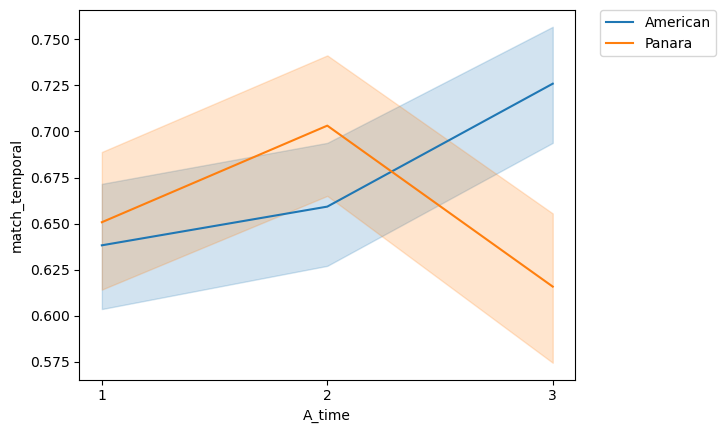

In [43]:
sns.lineplot(x='A_time',y='match_temporal',hue='population',data=plain_agg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Interestingly, this result appears to be affected by the presence of a burst, although only for Panara participants (below).  Specifically, Panara participants are better at differentiating A from B when the stimuli have audible stop bursts.  Stimuli that Panara participants are more likely to perceive as underlyingly /T/ exhibit the most categoralness based on the relative duration of N and T.  What could this mean though?

Certainly, it reinforces the idea that both the manipulated temporal and burst components of the stimuli are meaningful for the Panara participants and not for the American participants.

It also means when no burst is present, Panara listeners are less likely to exhibit categorical perception, suggesting that lack of a burst biases listeners towards perception of underying /N/ *more* than a burst biases them towards perception of underlying /T/.  

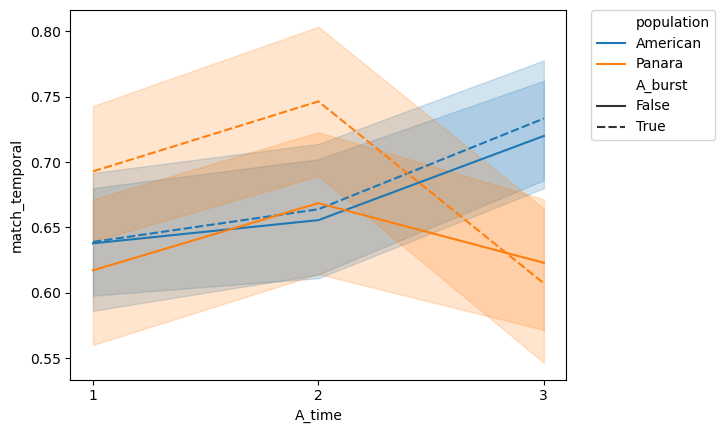

In [36]:
sns.lineplot(x='A_time',y='match_temporal',hue='population',style='A_burst',data=plain_agg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

But, overall, this is what we expected! Native Panara speakers exhibiting categorical perception, non-speakers not exhibiting categorical perception!

### Adding spectral variation 

Next, let's see what happens when A and B vary along a spectral dimension as well as temporal.  For each subject/series/A_time/A_burst combination, calculate the rate at which the stimulus chosen matched temporally vs. spectrally.

In [37]:
varydf=responsedf[responsedf.same_spectral!='']
vary_agg=varydf.groupby(['subject','population','change_vowel','change_nsource','change_burst','A_time','A_burst'],
                        as_index=False).aggregate(np.mean)

In [38]:
vary_agg['change'] = vary_agg.apply(lambda x: 'vowel' if x.change_vowel else ('nsource' if x.change_nsource else 'burst'), axis=1)

In [40]:
vary_agg.head()

,subject,population,change_vowel,change_nsource,change_burst,A_time,A_burst,order,response,repeats,age,streak1,streak0,streak,streakalt,match_temporal,match_spectral,change
0,102,American,False,False,True,1,False,129.875,0.750,NaN,20.0,1.875,0.250,2.125,1.375,0.125,0.875,burst
1,102,American,False,False,True,1,True,119.250,0.625,NaN,20.0,0.875,1.250,2.125,2.000,0.375,0.625,burst
2,102,American,False,False,True,2,False,112.625,0.500,NaN,20.0,1.125,0.750,1.875,1.250,0.500,0.500,burst
3,102,American,False,False,True,2,True,153.375,0.375,NaN,20.0,0.500,1.875,2.375,1.000,0.500,0.500,burst
4,102,American,False,False,True,3,False,105.000,0.375,NaN,20.0,0.500,1.500,2.000,1.750,0.625,0.375,burst


The overall pattern is the same for both American and Panara populations: 
- The most impactful difference is in the orality/nasality of the following vowel.  When A and B differ in the vowels following the [NT] sequence, listeners are significantly more likely to match X to A or B by its spectral rather than its temporal characteristics.
- The presence or absence of a burst is least impactful.  When A and B differ in whether a burst is present, both American and Panara participants are most likely to match X to A or B by its temporal characteristics, and the effect appears to be roughly the same magnitude for both populations.

Furthermore, **American and Panara participants are *most different* from each other in terms of their perception of stimuli when the change occurs in the source of N.  American participants are more sensitive to this change than Panara participants.**

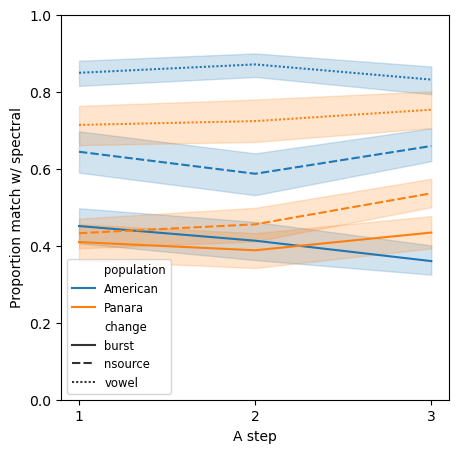

In [41]:
f, axes = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.lineplot(x='A_time',y='match_spectral',hue='population',style='change',data=vary_agg)
ax.axes.set(ylabel='Proportion match w/ spectral', xlabel="A step",ylim=[0,1])
ax.legend(fontsize='small')
fig = ax.get_figure()
fig.savefig('ABX2.pdf')

Here's another way to conceptualize this data with boxplots. 

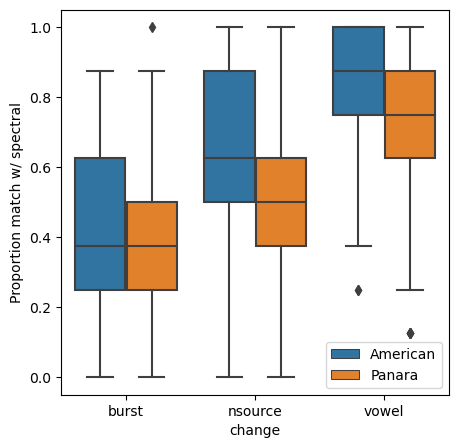

In [49]:
f, axes = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.boxplot(x='change',y='match_spectral',hue='population',data=vary_agg)
ax.axes.set(ylabel='Proportion match w/ spectral')
ax.legend(loc='lower right')
fig = ax.get_figure()
fig.savefig('ABX2_box.pdf')

## Research Answers!

> 1. First, we wished to **confirm that native English speakers do not behave the same as Panara speakers**. To that end, we designed the AXB task to include both a traditional AXB design, in which A and B are stimuli that differ from each other in only one dimension, and X is identical to one of them. In this type of task, we would expect a peak in "correct" discrimination of X with A or B at pre-established identification boundaries. In contrast, we should expect English speakers naive to Panara's phonological system to show little or no peak in discrimination, though they may show improvements in correct discrimination.

On this point, we confirmed that English speakers who are naive to Panara's phonology do behave quite differently from native Panara speakers. English speaking participants do not demonstrate a discrimination peak while Panara speakers do.

> 1. Second, the AXB task provided a unique opportunity to ask ***which* of the three manipulated acoustic cues *most* affected listeners' behavior**. In addition to the usual AXB task where X is identical to one of A or B, we added trials in which A and B differed along *two* dimensions, and X was the same as A in one dimension but the same as B in the other dimension.

Here, we learned that listeners responded the least to changes in burst presence compared to changes to the source of the nasal component, and that English speakers picked up on changes in the source of nasal than Panara speakers did. On the other hand, Panara speakers were most sensitive to temporal changes over either of the spectral manipulations. 
Quite a few questions remain, such as determining the equivalent magnitude of changes to any of these acoustic cues, that won't be addressed in thi